# Linear regression 

Linear regression shows the relationship between two variables by fitting a linear equation (line, usually diagonal) to observed data. A linear regression line has an equation of the form <br>
<br>
$Y = b0 + b1X + e$<br>
<br>
where $X$ is the independent variable, $Y$ is the dependent variable, e is the correction for scattered value or residual, $b0$ is the intercept and $b1$ is the slope ($b$0 and $b1$ = coefficient and they fix the line in linear regression plot)

<strong>Objective</strong>
<br>
The exercise objective is to build a linear regression model to predict the log number of shares an article received

Get all necessaries libraries and dependencies for the exercise.

In [28]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt 
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

The following is the first 10 lines of the provided data frame for this excercise: mashable.csv.

In [29]:
df = pd.read_csv('mashable.csv')
df = df.dropna()
#Show first 10 rows of dataframe
df.head(10)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375000,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000000,6000,3.778151
5,6,http://mashable.com/2014/04/24/amazing-lebron-...,13,303,2,0,4.970297,0,0,0,...,0,0,0,0,0.394298,0.048684,0.000000,0.000000,1200,3.079181
6,7,http://mashable.com/2013/06/22/social-media-we...,6,544,11,0,4.617647,0,0,0,...,0,1,0,1,0.439512,0.267391,0.500000,0.500000,3500,3.544068
7,8,http://mashable.com/2013/07/09/russian-deletes...,12,223,1,0,4.399103,0,0,0,...,0,0,0,0,0.394792,0.053125,0.218182,0.145455,1500,3.176091
8,9,http://mashable.com/2013/03/07/3d-printed-skull/,8,438,1,0,5.027397,0,0,0,...,0,0,0,0,0.479187,0.166913,0.500000,0.200000,3100,3.491362
9,10,http://mashable.com/2013/11/16/xbox-one-vs-pla...,11,389,1,1,4.642674,0,0,1,...,0,1,0,1,0.417229,0.183895,0.166667,0.000000,27300,4.436163


In [30]:
df.corr().sort_values('shares_log', ascending=False)

,id,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
shares_log,-0.003900,-0.012247,0.032897,0.085575,0.037147,-0.031730,0.036926,-0.080967,-0.033469,0.085516,...,0.006309,0.072644,0.071864,0.105919,0.093021,0.053199,0.055161,0.050216,0.483322,1.000000
shares,-0.000407,0.011404,0.009625,0.037395,0.025691,-0.007094,0.003820,-0.013069,-0.004352,0.004336,...,-0.002876,0.011820,0.004585,0.011887,0.042049,0.008655,0.019736,0.009655,1.000000,0.483322
is_weekend,0.009324,-0.002890,0.044572,0.053317,-0.016556,-0.005759,0.041413,-0.005749,-0.051383,-0.001594,...,-0.159362,0.660882,0.702154,1.000000,0.014754,0.023717,0.021418,0.034256,0.011887,0.105919
global_subjectivity,0.004155,-0.036779,0.093424,0.069931,0.089470,0.523029,0.054790,0.027306,-0.046447,0.026838,...,0.012810,0.004367,0.015468,0.014754,1.000000,0.315314,0.125244,0.033078,0.042049,0.093021
num_imgs,-0.001707,0.000777,0.357047,1.000000,-0.073084,0.022387,0.001179,0.111108,-0.144599,-0.008554,...,-0.009555,0.027809,0.044483,0.053317,0.069931,0.014196,0.056100,0.046353,0.037395,0.085575
data_channel_is_socmed,0.011212,-0.089559,0.035805,-0.008554,-0.014793,0.021908,-0.061806,-0.118710,-0.113122,1.000000,...,0.000117,0.010063,-0.011666,-0.001594,0.026838,0.058003,-0.013620,0.024063,0.004336,0.085516
weekday_is_saturday,0.004893,-0.018488,0.030457,0.027809,-0.009846,-0.019250,0.021400,-0.015870,-0.044736,0.010063,...,-0.105320,1.000000,-0.070326,0.660882,0.004367,0.017369,0.002299,0.028072,0.011820,0.072644
weekday_is_sunday,0.007751,0.013699,0.030348,0.044483,-0.012664,0.010608,0.034742,0.007414,-0.025853,-0.011666,...,-0.111897,-0.070326,1.000000,0.702154,0.015468,0.015045,0.026287,0.018899,0.004585,0.071864
title_subjectivity,-0.008384,0.075907,0.004364,0.056100,0.058613,-0.037501,-0.005399,0.045334,-0.040481,-0.013620,...,0.004438,0.002299,0.026287,0.021418,0.125244,0.026624,1.000000,0.238629,0.019736,0.055161
global_sentiment_polarity,-0.002630,-0.059906,0.014327,0.014196,-0.027871,0.146979,0.077873,-0.044559,0.063373,0.058003,...,-0.012807,0.017369,0.015045,0.023717,0.315314,1.000000,0.026624,0.238290,0.008655,0.053199


The correlations with sharing are strongest for is_weekend, global_subjectivity, num_imgs, data_channel_is_socmed, weekday_is_saturday (in descending order; shares were not chosen because too similar with shares_log)<br>
<br>
As long as you have enough data, we can include many variables. Let's put them all in a linear model. For sk-learn to work, we first need to create separate X and Y that include only the variables that we want to use.

Since the objective is to build a linear regression model to predict the log number of shares an article received, the $y$ variable will be shares_log. Then the 5 $x$ variables are taken from the strongest correlated variables to shares_log as processed above. These variables are needed for sk-learn to work.

In [31]:
y = df['shares_log']
X = df[['is_weekend', 'global_subjectivity', 'num_imgs', 'data_channel_is_socmed', 'weekday_is_saturday']] 
X.index = df['url']
#Show first 5 rows of the X index to the variables
X.head()

,is_weekend,global_subjectivity,num_imgs,data_channel_is_socmed,weekday_is_saturday
url,,,,,
http://mashable.com/2013/10/29/ashton-kutcher-lenovo/,0,0.439379,12,0,0
http://mashable.com/2014/09/08/mashies-sept-19-deadline/,0,0.300454,6,0,0
http://mashable.com/2013/02/01/hello-kitty-rocket/,0,0.575486,0,0,0
http://mashable.com/2014/02/06/add-us-on-snapchat/,0,0.327220,2,0,0
http://mashable.com/2014/01/07/lindsey-vonn-withdraws-sochi-olympics-knee-injury/,0,0.507709,18,0,0


In the below cell, we separate the training and test data. This built-in function from sk-learn splits the data set randomly into a train set and a test set. The test_size is 0.3, so the data is split into 70% training data and 30% test data

In [32]:
#split the data and store it into different variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#Show first 5 rows of the train data
X_train.head()

,is_weekend,global_subjectivity,num_imgs,data_channel_is_socmed,weekday_is_saturday
url,,,,,
http://mashable.com/2013/02/03/puppy-bowl-online/,1,0.451711,0,0,0
http://mashable.com/2014/09/11/bridesmaid-lost-dress-sydney/,0,0.476976,9,0,0
http://mashable.com/2013/03/08/facebook-acquires-storylane/,0,0.488495,1,0,0
http://mashable.com/2014/04/29/yahoo-mail-app-redesign/,0,0.545746,23,0,0
http://mashable.com/2013/08/28/chef-knife-moves-video/,0,0.507042,13,0,0


In the below cell, we create the lineal model and train it.

In [33]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In the below cell, we can see the coefficients.

In [34]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
0.121217,is_weekend
0.296652,global_subjectivity
0.003686,num_imgs
0.134612,data_channel_is_socmed
0.013249,weekday_is_saturday


We can interpret these coefficients as follows:

* If it's published on the weekend, it adds 0.12 to the shares log
* The global subjectivity adds 0.29 to the shares log
* The number of images adds 0.003 to the shares log
* If the channel used is social media, it adds 0.13 to the shares log
* If it's published on a saturday, it adds 0.013 to the shares log

On the below cell, we'll generate predictions and calculate the R^2 and RMSE.

In [35]:
#Generate predictions for the test data. So we use X.test, not X.train
y_test_p = lm.predict(X_test)
r2_score(y_test, y_test_p)

0.03265774811117872

The R^2 is 0.032, which means 3.2% of the variation in the shares logs is explained by the model. That's pretty low! <br>The below cell is to calculate the RMSE: the root mean squared error.

In [36]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.39934650944345973

The RMSE is 0.4. Which means that we are typically about 0.4 off in our predicted rating (which goes from 0-10). <br>The below plots are the plot of predicted value against the actual shares log. The first one zooming in into the scatter plots and the second one with the diagonal line and values on the X and Y axis to compare.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


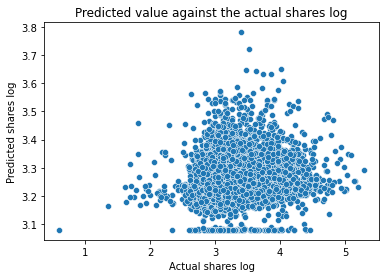

In [37]:
sns.scatterplot(y_test, y_test_p)
plt.title('Predicted value against the actual shares log')
plt.xlabel('Actual shares log')
plt.ylabel('Predicted shares log')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


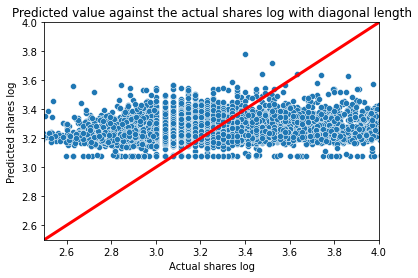

In [38]:
sns.scatterplot(y_test, y_test_p)
plt.title('Predicted value against the actual shares log with diagonal length')
plt.xlabel('Actual shares log')
plt.ylabel('Predicted shares log')
plt.xlim([2.5, 4]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([2.5, 4])
plt.plot([2.5, 4], [2.5, 4], color='red', lw=3) #Plot a diagonal length
plt.show()

The predictions are quite off. The articles with low shares log have higher predicted value than the actual value and vice versa for the higher ones. The model doesn't seem to fit the case.